In [7]:
from grale.all_nb import *
import pickle

In [8]:
cosm = cosmology.Cosmology(0.7, 0.3, 0, 0.7)
cosmology.setDefaultCosmology(cosm)
D = cosm.getAngularDiameterDistance

zd = 0.4
trueLens = lenses.GravitationalLens.load("truelens.lensdata")
liTrue = plotutil.LensInfo(trueLens, size=80*ANGLE_ARCSEC, zd=zd, zs=2)

srcPos = pickle.load(open("srcpos.pickle", "rb"))
srcPos = np.array(srcPos)

In [9]:
solNoNoise = lenses.GravitationalLens.load("sol_mcmc_nonoise.lensdata")
liSolNoNoise = plotutil.LensInfo(solNoNoise, size=80*ANGLE_ARCSEC, zd=zd, zs=2)

solNoise = lenses.GravitationalLens.load("sol_mcmc_noise.lensdata")
liSolNoise = plotutil.LensInfo(solNoNoise, size=80*ANGLE_ARCSEC, zd=zd, zs=2)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

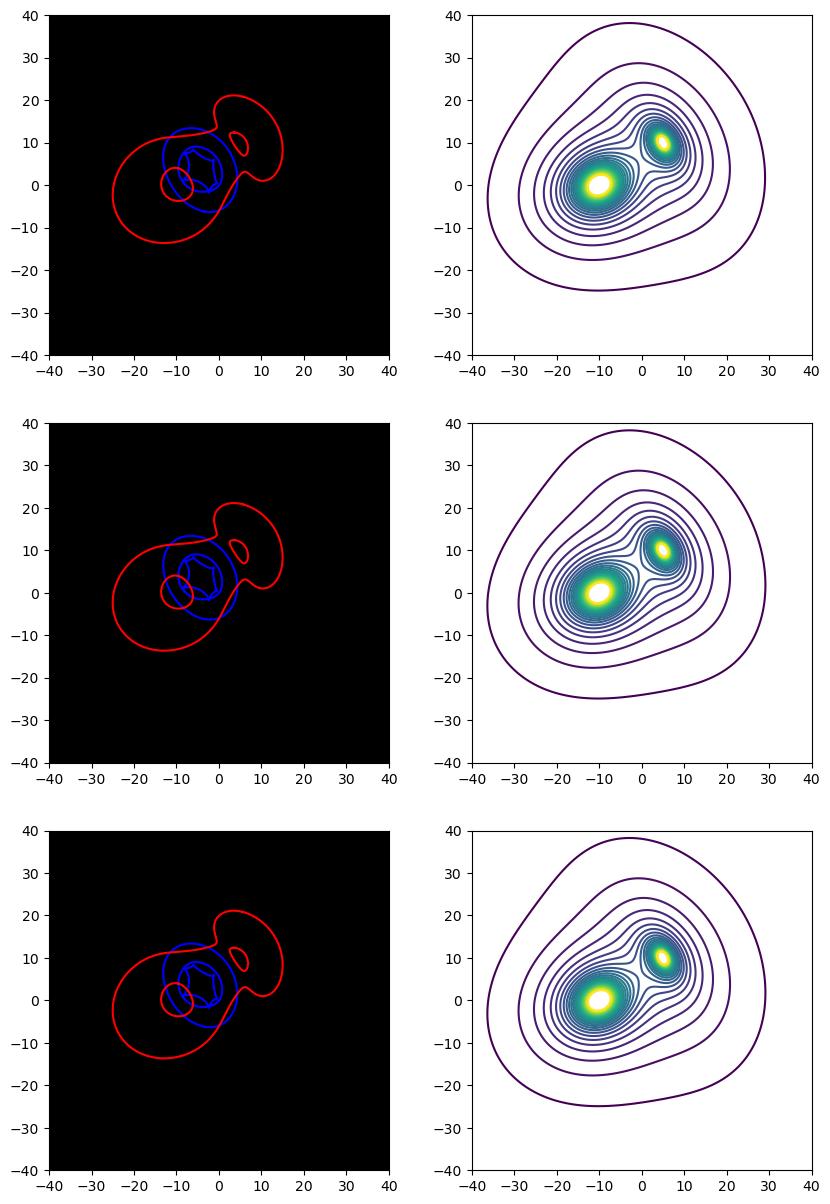

In [10]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
plotutil.plotImagePlane(liTrue)
plt.subplot(3,2,2)
plotutil.plotDensityContours(liTrue, levels=np.arange(0.5, 15, 0.5))
plt.subplot(3,2,3)
plotutil.plotImagePlane(liSolNoNoise)
plt.subplot(3,2,4)
plotutil.plotDensityContours(liSolNoNoise, levels=np.arange(0.5, 15, 0.5))
plt.subplot(3,2,5)
plotutil.plotImagePlane(liSolNoise)
plt.subplot(3,2,6)
plotutil.plotDensityContours(liSolNoise, levels=np.arange(0.5, 15, 0.5))


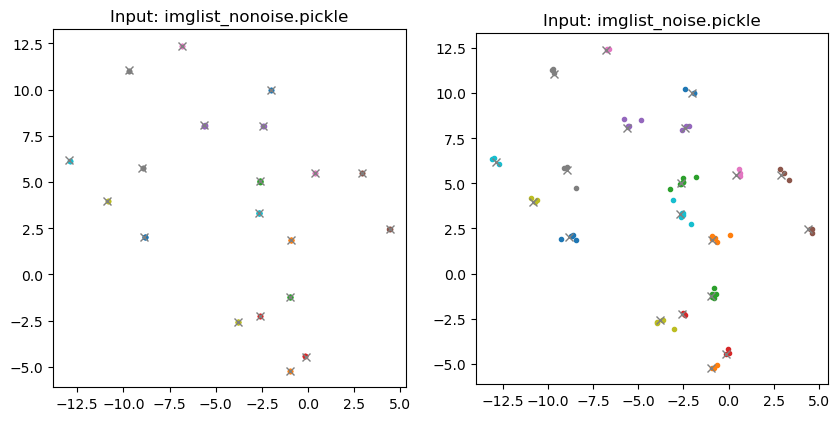

In [11]:
plt.figure(figsize=(10,5))
for idx, fn, sol in [ (1, "imglist_nonoise.pickle", solNoNoise),
                      (2, "imglist_noise.pickle", solNoise)]:
    plt.subplot(1,2,idx)
    imgList = pickle.load(open(fn, "rb"))

    iws = inversion.InversionWorkSpace(zd, 80*ANGLE_ARCSEC)
    for i in imgList:
        iws.addImageDataToList(i["imgdata"], i["z"], "pointimages")

    plotutil.plotImagesData(iws.backProject(sol))
    plt.plot(srcPos[:,0]/ANGLE_ARCSEC, srcPos[:,1]/ANGLE_ARCSEC, 'x', color='gray')
    plt.gca().set_aspect("equal")
    plt.title(f"Input: {fn}")

In [13]:
print("Property: true value | nonoise images | noisy images")
print("----------------------------------------------------")
paramsTrue = trueLens.getLensParameters()
paramsNoise = solNoise.getLensParameters()
paramsNoNoise = solNoNoise.getLensParameters()
for idx in range(len(paramsTrue)):
    objT, objNN, objN = paramsTrue[idx], paramsNoNoise[idx], paramsNoise[idx]
    for k in objT:
        if k == "lens":
            continue # Do this later
        if k == "factor":
            continue # Was fixed, not important
        scale = ANGLE_ARCSEC if k in [ "x", "y" ] else 1
        vT, vNN, vN = objT[k]/scale, objNN[k]/scale, objN[k]/scale
        print(f"{k}:\t {vT:.5g} \t| {vNN:.5g} \t| {vN:.5g}")

    objT, objNN, objN = map(lambda x: x["lens"].getLensParameters(), [objT, objNN, objN])
    for k in objT:
        #scale = ANGLE_ARCSEC if k in [ "coreRadius" ] else 1
        scale = ANGLE_ARCSEC if k in [ "coreradius", "scaleradius" ] else 1
        vT, vNN, vN = objT[k]/scale, objNN[k]/scale, objN[k]/scale
        print(f"{k}:\t {vT:.5g} \t| {vNN:.5g} \t| {vN:.5g}")

Property: true value | nonoise images | noisy images
----------------------------------------------------
angle:	 30 	| 29.97 	| 30.879
x:	 -10 	| -10.001 	| -9.9399
y:	 0 	| -0.0005826 	| -0.013155
centraldensity:	 30 	| 29.92 	| 29.474
coreradius:	 1.5 	| 1.5011 	| 1.5597
scaleradius:	 20 	| 20.089 	| 18.728
epsilon:	 0.1 	| 0.09976 	| 0.10118
angle:	 -60 	| -59.999 	| -58.75
x:	 5 	| 5.0016 	| 4.9563
y:	 10 	| 9.9995 	| 10.005
centraldensity:	 40 	| 39.798 	| 43.647
coreradius:	 0.5 	| 0.50158 	| 0.45625
scaleradius:	 40 	| 40.38 	| 41.712
epsilon:	 0.2 	| 0.19981 	| 0.18818
